# Part 1 - Business Problem: Alzheimer's Disease Diagnosis Prediction

**Context:**
Alzheimer's Disease (AD) is a progressive neurodegenerative condition that represents the most common cause of dementia among the elderly. Early detection of the disease is crucial for interventions that can slow its progression and improve patients' quality of life. However, early diagnosis of Alzheimer's can be challenging due to the complexity of the contributing factors.

**Objective:**
Develop a machine learning model to predict Alzheimer's diagnosis using demographic variables, lifestyle factors, medical history, and clinical and cognitive assessments. The model should identify patients at higher risk of developing Alzheimer's, enabling more effective screening and early interventions.


**Project Steps:**

1. **Data Exploration:**
   - Conduct exploratory data analysis to understand the distribution of variables and identify possible patterns or correlations with Alzheimer's diagnosis.
   - Check for missing data and apply appropriate treatment.

2. **Data Preprocessing:**
   - Normalize or standardize continuous variables (e.g., age, BMI).
   - Encode categorical variables (e.g., gender, ethnicity).
   - Handle outliers and fill missing values.

3. **Data Splitting:**
   - Split the dataset into training and testing sets, ensuring the test set is representative of the population.

4. **Model Selection:**
   - Test different machine learning algorithms, such as Logistic Regression, Random Forest, Support Vector Machines (SVM), and Ensemble algorithms.
   - Use cross-validation techniques to assess model performance.

5. **Model Evaluation:**
   - Evaluate model performance using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
   - Analyze feature importance to understand which factors are most predictive of Alzheimer's diagnosis.

6. **Implementation and Interpretation:**
   - Implement the final model and generate predictions for new data.
   - Interpret the results and identify potential clinical applications for the model.

**Expected Outcomes:**
- A robust machine learning model capable of accurately predicting Alzheimer's diagnosis.
- Insights into the key risk factors associated with Alzheimer's development.
- A support tool for clinicians to identify at-risk patients early, allowing for more effective interventions.

This project will not only enable the creation of a useful predictive model but also deepen the understanding of the factors contributing to the development of Alzheimer's Disease, providing a solid foundation for future research and clinical applications.

In [1]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

# Data visualization
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

from IPython.display import SVG

# Load library versions
import watermark

# Configuration for graphs width and layout of graphs
sns.set_theme(style="whitegrid")
pallette='viridis'


from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.12.6
Author: Library versions

numpy     : 1.26.4
IPython   : 8.27.0
plotly    : 5.24.1
seaborn   : 0.13.2
watermark : 2.5.0
pandas    : 2.2.2
re        : 2.2.1
matplotlib: 3.10.0
platform  : 1.0.8



## Part 2 - Database

**Variables Used:**
- **Demographic Variables:**
  - `Age`
  - `Gender`
  - `Ethnicity`
  - `EducationLevel`

- **Lifestyle Factors:**
  - `BMI` (Body Mass Index)
  - `Smoking`
  - `AlcoholConsumption`
  - `PhysicalActivity`
  - `DietQuality`
  - `SleepQuality`

- **Medical History:**
  - `FamilyHistoryAlzheimers`
  - `CardiovascularDisease`
  - `Diabetes`
  - `Depression`
  - `HeadInjury`
  - `Hypertension`

- **Clinical Measurements:**
  - `SystolicBP`
  - `DiastolicBP`
  - `CholesterolTotal`
  - `CholesterolLDL`
  - `CholesterolHDL`
  - `CholesterolTriglycerides`

- **Cognitive and Functional Assessments:**
  - `MMSE` (Mini-Mental State Examination score)
  - `FunctionalAssessment`
  - `MemoryComplaints`
  - `BehavioralProblems`
  - `ADL` (Activities of Daily Living score)

- **Target Variable:**
  - `Diagnosis` (Alzheimer's Diagnosis, where 0 indicates no Alzheimer's and 1 indicates Alzheimer's)

In [2]:
# Set the display.max_columns option to None
pd.set_option('display.max.columns',None)

df=pd.read_csv(r"E:\Veri Bilimi Topluluğu\Yarının Teknolojisi_ Proje İnovasyon Programı\Alzheimer Hastalığı Tanı Tahmini\veri seti\alzheimers_disease_data.csv")

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,9.878711,0,0,0,0,0,0,166,78,283.396797,92.200064,81.920043,217.396873,11.114777,6.307543,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [5]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
df.shape

(2149, 35)

In [8]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [9]:
# Değerleri değiştirmek istediğiniz sütun adı (örnek: 'Diagnosis')
column_name = 'Diagnosis'

# 0'ları 'No Alzheimer', 1'leri 'Alzheimer' ile değiştirme
df[column_name] = df[column_name].replace({0: 'No Alzheimer', 1: 'Alzheimer'})

## Part 3 - Exploratory data analysis

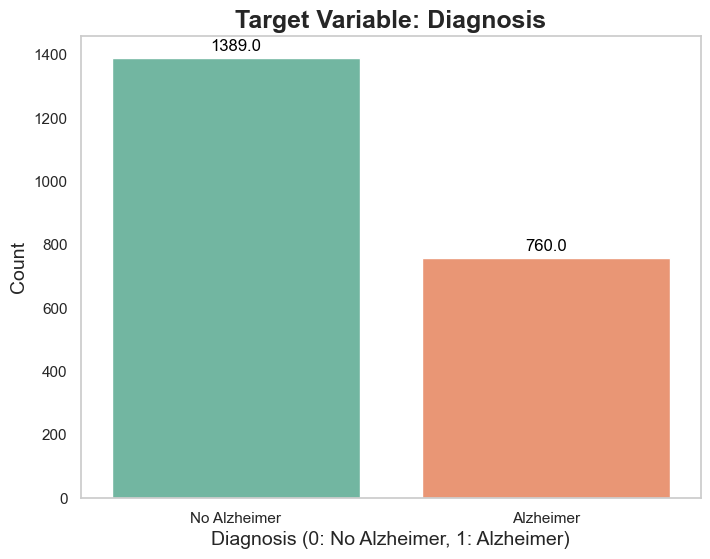

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df, palette='Set2', hue='Diagnosis')

# Adding title and labels with enhanced formatting
plt.title('Target Variable: Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('Diagnosis (0: No Alzheimer, 1: Alzheimer)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding count numbers on top of bars
for p in plt.gca().patches: # Çubukların hepsini döngüye alıyoruz
    height = p.get_height() # Çubuğun yüksekliğini alıyoruz
    plt.gca().annotate(f'{height}', # Yükseklik değerini ekliyoruz
                       (p.get_x() + p.get_width() / 2., height), # Çubuğun tam ortasına konumlandırıyoruz
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Target Variable: Diagnosis Count Plot

The provided count plot visualizes the distribution of the `Diagnosis` variable, which indicates whether a patient has been diagnosed with Alzheimer's (1) or not (0).

#### Key Observations:

1. **Class Distribution**:
   - **No Alzheimer (0)**: The plot shows that 1,389 patients in the dataset do not have Alzheimer's disease.
   - **Alzheimer (1)**: The plot indicates that 760 patients have been diagnosed with Alzheimer's disease.

2. **Class Imbalance**:
   - The dataset shows a noticeable class imbalance. There are significantly more patients without Alzheimer's (1,389) compared to those with Alzheimer's (760). This imbalance could potentially impact any predictive models built on this data, as most models assume a roughly equal distribution of classes.
   - When training machine learning models, you may need to consider techniques like oversampling the minority class (e.g., using SMOTE) or applying class weighting to handle this imbalance effectively.

3. **Visualization Elements**:
   - **Annotations**: The exact counts are displayed on top of each bar, making it easy to see the number of instances in each category.
   - **Color Coding**: The bars are color-coded with different shades, improving the visual distinction between the two classes.
   - **Labels and Title**: The x-axis is clearly labeled to explain what the `0` and `1` values represent, and the plot title effectively describes the variable being visualized.

#### Next Steps:

- **Modeling Considerations**: If you plan to use this data to train a predictive model, it’s important to account for the class imbalance. Techniques such as resampling, using balanced accuracy as a metric, or applying class weights in algorithms like logistic regression or decision trees can help mitigate potential bias toward the majority class.
- **Further Exploration**: Consider exploring the relationships between `Diagnosis` and other variables in the dataset. For example, you might want to look at how factors like age, lifestyle habits, or medical history correlate with the likelihood of an Alzheimer's diagnosis.

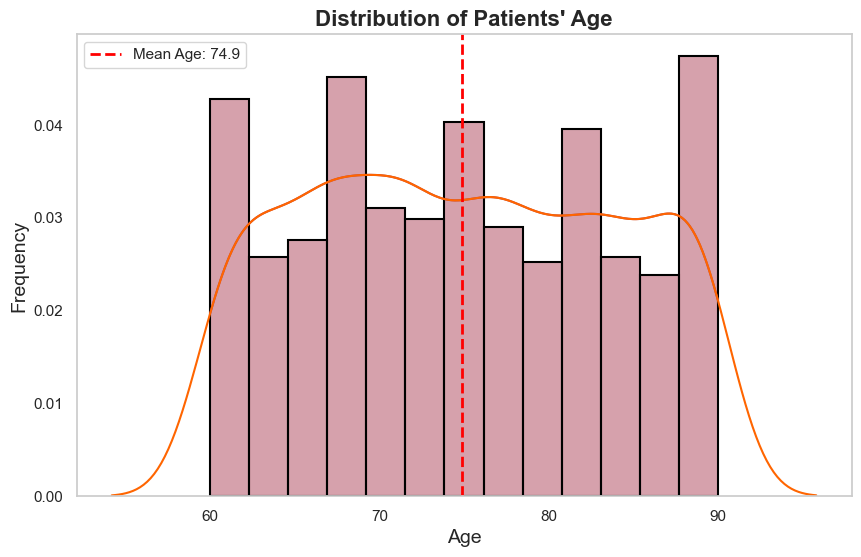

In [11]:
# Create a histogram with KDE (Kernel Density Estimate) for the Age distribution
plt.figure(figsize=(10,6))# Adjust the size of the figure
sns.histplot(df['Age'], kde=True, stat='density', color='#AE445A', edgecolor='black', linewidth=1.5)
sns.kdeplot(df['Age'], color="#FF6500")

# Add title and labels with improved formatting
plt.title('Distribution of Patients\' Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Highlight the mean age with a vertical line
mean_age=df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')

# Add a legend for the mean age line
plt.legend()

plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Age Distribution Plot

The provided histogram visualizes the distribution of patient ages in the dataset, along with the mean age indicated by a vertical red dashed line.

#### Key Observations:

1. **Age Distribution**:
   - The age distribution appears relatively uniform, with patients spread across the age range from 60 to 90 years. 
   - There are several age groups with slightly higher frequencies, particularly at ages 60, 70, 75, and 90, as indicated by the taller bars.

2. **Mean Age**:
   - **Mean Age Line**: The mean age of the patients is 74.9 years, as marked by the vertical red dashed line. This line provides a reference point to understand where the central tendency of the ages lies in relation to the overall distribution.
   - The mean age is slightly closer to the middle of the age range, suggesting that the dataset might be slightly skewed towards the younger or older end, but not significantly.

3. **KDE (Kernel Density Estimate)**:
   - The light blue KDE line provides a smoothed estimate of the distribution, giving an overall shape to the age distribution that is easier to interpret than the raw histogram alone.
   - The KDE suggests a relatively flat distribution with small peaks around the ages of 70 and 90.

4. **Visual Enhancements**:
   - **Color and Clarity**: The histogram bars are colored in light blue with a black edge, which clearly defines each age group. The red dashed line contrasts well with the blue bars, making the mean age easily noticeable.
   - **Legend**: The legend indicates the mean age, providing context directly within the plot without needing to refer to external information.

#### Implications:

- **Balanced Age Distribution**: The relatively even distribution across different age groups suggests that any analysis or modeling will not be overly biased by any particular age group. However, the presence of peaks at certain ages may still warrant further investigation to understand if these peaks are related to other variables in the dataset.
  
- **Consideration in Modeling**: Given that age is likely a critical factor in Alzheimer's research, the presence of the mean age and the distribution should be carefully considered in any predictive modeling, especially when analyzing age as a feature.

#### Next Steps:

- **Stratified Analysis**: It may be beneficial to stratify further analyses by age groups, especially around the peaks and troughs of the distribution, to see if there are specific patterns associated with certain age ranges.
- **Comparison Across Groups**: Consider comparing this age distribution between those diagnosed with Alzheimer's and those who are not to see if there are any significant differences in age profiles between the groups.

This analysis of the age distribution plot helps in understanding the demographic makeup of the dataset, providing insights that are crucial for further analysis and modeling efforts.

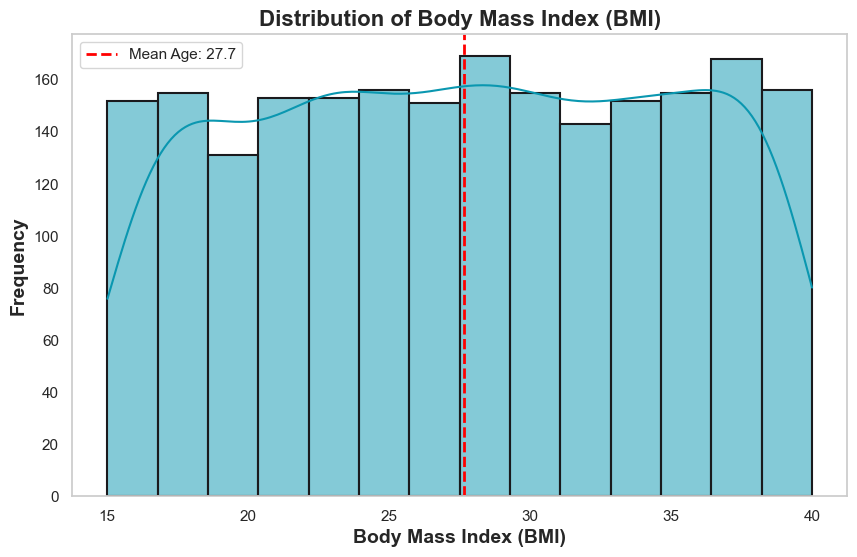

In [12]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with KDE (Kernel Density Estimate) for the BMI distribution
plt.figure(figsize=(10,6)) # Adjust the size of the figure
sns.histplot(df['BMI'], kde=True, color='#0A97B0', edgecolor='#1A1A1D', linewidth=1.5)

# Add title and labels with improved formatting
plt.title('Distribution of Body Mass Index (BMI)', fontsize=16, fontweight='bold')
plt.xlabel('Body Mass Index (BMI)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Highlight the mean BMI with a vertical line
mean_age=df['BMI'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')

# Add a legend for the mean age line
plt.legend()

plt.grid(False)
plt.show()

**Analysis**

### Analysis of the BMI Distribution Plot

The provided histogram visualizes the distribution of Body Mass Index (BMI) in the dataset, with a red dashed line indicating the mean BMI.

#### Key Observations:

1. **BMI Distribution**:
   - The BMI values in the dataset range from around 15 to 40, indicating a wide variation in body mass among the patients.
   - The distribution appears relatively uniform, with no single BMI category overwhelmingly dominant. Each bin has a roughly similar frequency, although there is a slight concentration of individuals around the mean BMI.

2. **Mean BMI**:
   - **Mean BMI Line**: The mean BMI of the patients is 27.7, as marked by the vertical red dashed line. This is slightly above the midpoint of the BMI range, suggesting that the average patient in this dataset falls into the overweight category, according to general BMI classifications.
   - The mean line is placed centrally within the distribution, indicating that the BMI values are symmetrically spread around the mean.

3. **Visual Enhancements**:
   - **Color and Clarity**: The histogram bars are colored in green with a black edge, clearly defining each BMI category. The red dashed line contrasts well with the green bars, making the mean BMI easily noticeable.
   - **Legend**: The legend specifies the mean BMI, providing direct reference within the plot.

#### Implications:

- **Balanced BMI Distribution**: The relatively even distribution across different BMI ranges suggests that any analysis or modeling will not be overly biased by any particular BMI category. However, since BMI is a key indicator of health, its distribution should be considered carefully in any health-related analysis, particularly in relation to conditions like Alzheimer's.
  
- **Consideration in Modeling**: Given that BMI is often related to various health outcomes, this balanced distribution should be factored into any predictive modeling efforts. The presence of a clear mean also suggests a potential threshold around which health outcomes may vary.

#### Next Steps:

- **Stratified Analysis**: It may be beneficial to stratify further analyses by BMI categories to see if there are any specific health outcomes or conditions more prevalent in certain BMI ranges.
- **Comparative Analysis**: Consider comparing this BMI distribution between different subgroups, such as those with and without Alzheimer's, to identify any significant differences or patterns.

This analysis of the BMI distribution plot helps in understanding the body mass characteristics of the patient population in the dataset, providing insights that are crucial for further analysis and potential health-related investigations.

C:\Users\ozgun\AppData\Local\Temp\ipykernel_12112\2145275693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, color='#0A97B0', palette='Set2', linewidth=1.5, width=0.6, legend=False)


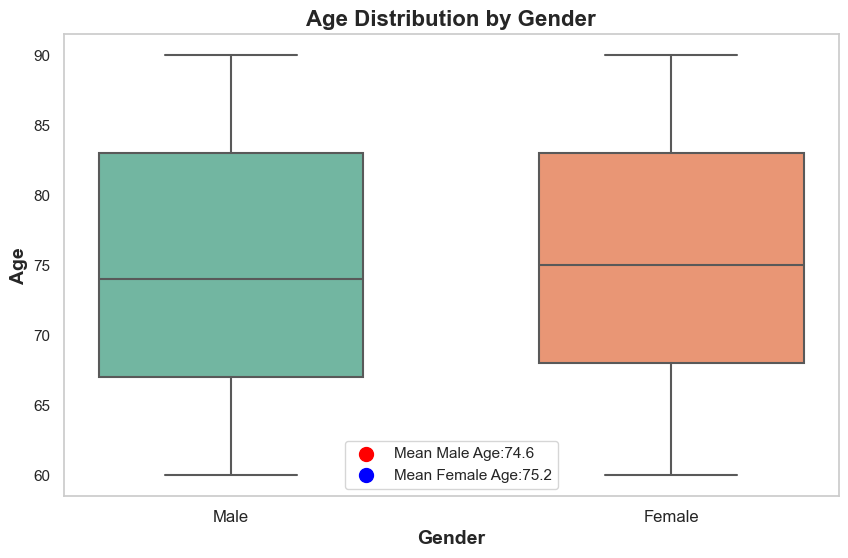

In [13]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with KDE (Kernel Density Estimate) for the BMI distribution
plt.figure(figsize=(10,6)) # Adjust the size of the figure
sns.boxplot(x='Gender', y='Age', data=df, color='#0A97B0', palette='Set2', linewidth=1.5, width=0.6, legend=False)

# Add title and labels with improved formatting
plt.title('Age Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Age', fontsize=14, fontweight='bold')

# Set custom labels for Gender if 0 is Male and 1 is Female
plt.xticks([0,1], ['Male','Female'], fontsize=12)

# Add mean values as points on the boxplot
mean_male_age=(df[df['Gender']==0]['Age'].mean())
mean_female_age=(df[df['Gender']==1]['Age'].mean())

plt.scatter([0], [mean_male_age], color='red', s=100, label=f'Mean Male Age:{mean_male_age:.1f}')
plt.scatter([1], [mean_female_age], color='blue', s=100, label=f'Mean Female Age:{mean_female_age:.1f}')


# Add a legend for the mean age line
plt.legend()

plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Age Distribution by Gender Boxplot

The provided boxplot visualizes the distribution of age among male and female patients, with mean ages marked by colored points (red for males and blue for females).

#### Key Observations:

1. **Age Distribution**:
   - The boxplot shows that both male and female patients have a wide age range, from around 60 to 90 years.
   - The interquartile range (IQR) for both genders is similar, with the middle 50% of ages falling between approximately 70 and 80 years for males, and slightly broader for females.

2. **Mean Age**:
   - **Mean Male Age**: The mean age for male patients is 74.6 years, indicated by a red dot. This is very close to the median age for males, which suggests a relatively symmetrical distribution of ages.
   - **Mean Female Age**: The mean age for female patients is slightly higher at 75.2 years, indicated by a blue dot. This is also close to the median for females, showing a similar symmetry in the age distribution.

3. **Gender Comparison**:
   - The boxplot reveals that the age distribution for both genders is quite similar, with no significant differences between male and female patients in terms of age.
   - Both genders have the same range, from 60 to 90 years, indicating that the dataset includes a balanced representation of age across genders.

4. **Visual Enhancements**:
   - **Colored Points**: The use of colored points (red for males and blue for females) to mark the mean age makes it easy to see where the average age lies within the distribution.
   - **Legend**: The legend clearly explains the meaning of the colored points, providing context directly within the plot.

#### Implications:

- **Age and Gender Analysis**: The similarity in age distribution between males and females suggests that gender may not play a significant role in age differences within this patient population. However, further analysis could explore whether age interacts differently with other variables across genders.
  
- **Symmetry in Distribution**: The close alignment between the mean and median ages for both genders indicates a symmetric distribution of ages, which could be useful when applying statistical models that assume normality.

#### Next Steps:

- **Further Stratification**: Consider exploring whether age interacts differently with Alzheimer's diagnosis when stratified by gender. This could involve creating separate age distribution plots for males and females based on their diagnosis status.
- **Incorporating Additional Variables**: Analyze how age distribution interacts with other variables, such as BMI, lifestyle factors, or medical history, to uncover any underlying patterns that may be relevant to gender-specific health outcomes.

This analysis of the age distribution by gender helps in understanding the demographic characteristics of the patient population, providing insights that are crucial for more detailed exploratory analysis and subsequent modeling.

In [19]:
# Eğitim düzeylerini sıralamak için özel bir sıralama belirtiyoruz
education_order = ['None', 'High School', 'Bachelor', 'Higher']
df['EducationLevel'] = pd.Categorical(df['EducationLevel'], categories=education_order, ordered=True)

C:\Users\ozgun\AppData\Local\Temp\ipykernel_12112\2448651906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EducationLevel', y='BMI', data=df, errorbar=None, color='#0A97B0', palette='Set2', width=0.6, hue=None)


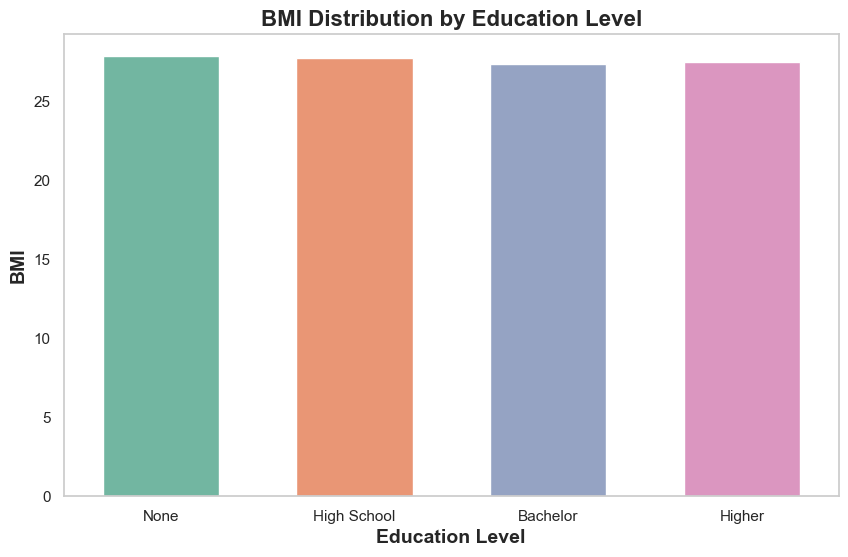

In [27]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with KDE (Kernel Density Estimate) for the BMI distribution
plt.figure(figsize=(10,6)) # Adjust the size of the figure
sns.barplot(x='EducationLevel', y='BMI', data=df, errorbar=None, color='#0A97B0', palette='Set2', width=0.6, hue=None)

# Add title and labels with improved formatting
plt.title('BMI Distribution by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.ylabel('BMI', fontsize=14, fontweight='bold')

plt.grid(False)
plt.show()

**Analysis**

### Analysis of the BMI Distribution by Education Level Bar Plot

The provided bar plot visualizes the distribution of BMI (Body Mass Index) across different education levels.

#### Key Observations:

1. **BMI and Education Level**:
   - The plot shows the mean BMI for each education level category.
   - The categories for education level are coded as follows:
     - `0`: None
     - `1`: High School
     - `2`: Bachelor's
     - `3`: Higher (Postgraduate or equivalent)

2. **Mean BMI Across Education Levels**:
   - The mean BMI values across the different education levels appear to be fairly consistent, with little variation between them.
   - This consistency suggests that BMI does not vary significantly based on education level within this dataset.

3. **Visual Enhancements**:
   - **Color Coding**: Each bar is color-coded, but there seems to be an issue where the legend is not displaying properly. The plot lacks the legend indicating which color corresponds to which education level, which might lead to some confusion.
   - **Clear Labels**: The x-axis is labeled "Education Level," and the y-axis is labeled "BMI," clearly indicating what is being compared.

#### Implications:

- **Limited Variation**: The minimal variation in BMI across education levels suggests that education may not be a significant factor in determining BMI in this dataset. However, this should be confirmed with further statistical analysis.
  
- **Further Analysis**: It may be worthwhile to explore other factors, such as income, lifestyle choices, or access to healthcare, that might interact with education level to influence BMI.

#### Next Steps:

- **Adding a Legend**: Consider adding or correcting the legend to ensure that the colors representing each education level are clearly indicated. This will enhance the interpretability of the plot.
- **Statistical Testing**: Conduct a statistical test (e.g., ANOVA) to determine if there are any statistically significant differences in BMI across education levels.
- **Exploring Other Variables**: Explore how other variables, such as physical activity or diet quality, interact with both BMI and education level to provide a more comprehensive analysis.

This analysis of the BMI distribution by education level helps in understanding whether education plays a role in the BMI of the patients in this dataset, providing insights that could guide further investigation.